In [1]:
import numpy as np
from torch import Tensor
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.nn.init as init
import matplotlib.pyplot as plt
import torch.cuda
import time
import math
import torch as t
from fun_ctions import rot
from scipy.spatial.transform import Rotation as R
from MOT_Classes import Environment,Rubidium,particles,forward
from tqdm import tqdm
import MOT_vars as vr

In [13]:
particles.createuniform(T=0.01)

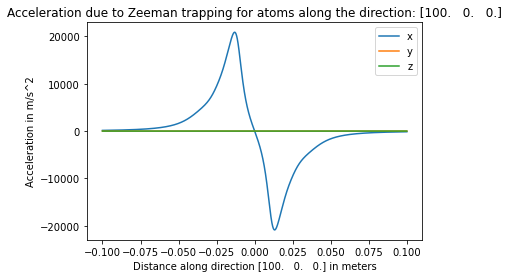

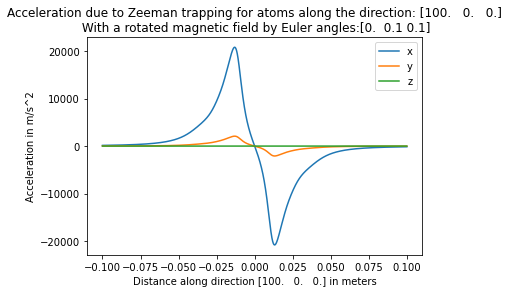

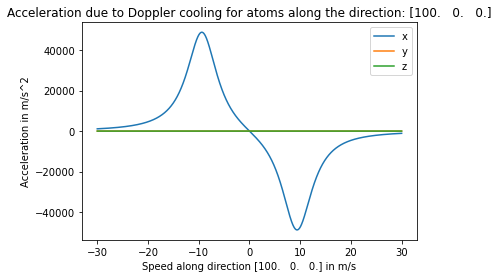

In [18]:
if False: #zeeman in x
    xsh,ysh,zsh=2000,1,1
    pos=t.zeros((3,xsh,ysh,zsh))
    pos[0],pos[1],pos[2]=t.meshgrid(t.linspace(-0.3,0.3,xsh),t.linspace(-0.01,0.9,ysh),t.linspace(-0.01,0.5,zsh))
    pos=pos.reshape(3,xsh*ysh*zsh).transpose(0,1).numpy()
    vel=t.zeros((xsh*ysh*zsh,3)).numpy()
    particles.createbyinp(pos,vel,2,3)
    Accel,_=forward()
    Accel=Accel.unsqueeze(0).unsqueeze(0)
    Accel=Accel.reshape(xsh,ysh,zsh,3)
    plt.plot(np.linspace(-0.3,0.3,xsh,endpoint=True),Accel[:,0,0,0].cpu().numpy())
    plt.show()
    
if False: #zeeman in y
    xsh,ysh,zsh=1,2000,1
    pos=t.zeros((3,xsh,ysh,zsh))
    pos[0],pos[1],pos[2]=t.meshgrid(t.linspace(-0.01,0.9,xsh),t.linspace(-0.3,0.3,ysh),t.linspace(-0.01,0.5,zsh))
    pos=pos.reshape(3,xsh*ysh*zsh).transpose(0,1).numpy()
    vel=t.zeros((xsh*ysh*zsh,3)).numpy()
    particles.createbyinp(pos,vel,2,3)
    Accel,_=forward()
    Accel=Accel.unsqueeze(0).unsqueeze(0)
    Accel=Accel.reshape(xsh,ysh,zsh,3)
    plt.plot(np.linspace(-0.3,0.3,ysh,endpoint=True),Accel[0,:,0,1].cpu().numpy())
    plt.show()
    
if False: #zeeman in z
    xsh,ysh,zsh=1,1,2000
    pos=t.zeros((3,xsh,ysh,zsh))
    pos[0],pos[1],pos[2]=t.meshgrid(t.linspace(-0.01,0.0,xsh),t.linspace(-0.01,0.9,ysh),t.linspace(-0.3,0.3,zsh))
    pos=pos.reshape(3,xsh*ysh*zsh).transpose(0,1).numpy()
    vel=t.zeros((xsh*ysh*zsh,3)).numpy()
    particles.createbyinp(pos,vel,2,3)
    Accel,_=forward()
    Accel=Accel.unsqueeze(0).unsqueeze(0)
    Accel=Accel.reshape(xsh,ysh,zsh,3)
    plt.plot(np.linspace(-0.3,0.3,zsh,endpoint=True),Accel[int(xsh/2),0,:,2].cpu().numpy())
    plt.show()
      
if False: #doppler in z
    xsh,ysh,zsh=5,5,2000
    vel=t.zeros((3,xsh,ysh,zsh))
    vel[0],vel[1],vel[2]=t.meshgrid(t.linspace(-25,25,xsh),t.linspace(-25,25,ysh),t.linspace(-25,25,zsh))
    vel=vel.reshape(3,xsh*ysh*zsh).transpose(0,1).numpy()
    pos=t.zeros((xsh*ysh*zsh,3)).numpy()
    particles.createbyinp(pos,vel,2,3)
    Accel,_=forward()
    Accel=Accel.unsqueeze(0).unsqueeze(0)
    Rates=Rates.unsqueeze(0).unsqueeze(2)
    Accel=Accel.reshape(xsh,ysh,zsh,3)
    plt.plot(np.linspace(-0.5,0.5,zsh,endpoint=True),Accel[int(xsh/2),int(ysh/2),:,2].cpu().numpy())
    plt.show
    
if True: #zeeman along a given direction
    direction=0.1*np.array([1,0,0])
    num=100000
    d=np.linalg.norm(direction)
    pos=t.zeros((3,num))
    pos[0]=t.linspace(-direction[0],direction[0],num)
    pos[1]=t.linspace(-direction[1],direction[1],num)
    pos[2]=t.linspace(-direction[2],direction[2],num)
    pos=pos.transpose(0,1)
    vel=t.zeros((3,num)).transpose(0,1)
    particles.createbyinp(pos,vel,2,3)
    Accel,_=forward()
    A=Accel.cpu().numpy()
    plt.title('Acceleration due to Zeeman trapping for atoms along the direction: '+str(np.round(100*direction/d)))
    plt.plot(np.linspace(-d,d,num),A[:,0],label='x')
    plt.plot(np.linspace(-d,d,num),A[:,1],label='y')
    plt.plot(np.linspace(-d,d,num),A[:,2],label='z')
    plt.xlabel('Distance along direction ' +str(np.round(100*direction/d))+' in meters')
    plt.ylabel('Acceleration in m/s^2')
    plt.legend()
    plt.show()

if True: #zeeman acceleration along a given direction with modified rotation of aHH field
    Ahhmod=[0,.1,.1]
    Environment.aHHassym=rot(alpha=Ahhmod[0],beta=Ahhmod[1],gamma=Ahhmod[2])
    direction=0.1*np.array([1,0,0])
    num=100000
    d=np.linalg.norm(direction)
    pos=t.zeros((3,num))
    pos[0]=t.linspace(-direction[0],direction[0],num)
    pos[1]=t.linspace(-direction[1],direction[1],num)
    pos[2]=t.linspace(-direction[2],direction[2],num)
    pos=pos.transpose(0,1)
    vel=t.zeros((3,num)).transpose(0,1)
    particles.createbyinp(pos,vel,2,3)
    Accel,_=forward()
    A=Accel.cpu().numpy()
    plt.title('Acceleration due to Zeeman trapping for atoms along the direction: '+str(np.round(100*direction/d))+'\n With a rotated magnetic field by Euler angles:'+str(np.array(Ahhmod)))
    plt.plot(np.linspace(-d,d,num),A[:,0],label='x')
    plt.plot(np.linspace(-d,d,num),A[:,1],label='y')
    plt.plot(np.linspace(-d,d,num),A[:,2],label='z')
    plt.xlabel('Distance along direction ' +str(np.round(100*direction/d))+' in meters')
    plt.ylabel('Acceleration in m/s^2')
    plt.legend()
    plt.show()    
    Environment.aHHassym=rot(alpha=0,beta=0)
    
if True: #doppler along a given direction
    direction=30*np.array([1,0,0])
    d=np.linalg.norm(direction)
    num=5000
    vel=t.zeros((3,num))
    vel[0]=t.linspace(-direction[0],direction[0],num)
    vel[1]=t.linspace(-direction[1],direction[1],num)
    vel[2]=t.linspace(-direction[2],direction[2],num)
    vel=vel.transpose(0,1)
    pos=t.zeros((3,num)).transpose(0,1)
    particles.createbyinp(pos,vel,2,3)
    Accel,_=forward()
    A=Accel.cpu().numpy()
    plt.title('Acceleration due to Doppler cooling for atoms along the direction: '+str(np.round(100*direction/d)))
    plt.plot(np.linspace(-d,d,num),A[:,0],label='x')
    plt.plot(np.linspace(-d,d,num),A[:,1],label='y')
    plt.plot(np.linspace(-d,d,num),A[:,2],label='z')
    plt.xlabel('Speed along direction ' +str(np.round(100*direction/d))+' in m/s')
    plt.ylabel('Acceleration in m/s^2')
    plt.legend()
    plt.show()


In [4]:
print(Environment.Is)
print(Environment.Kmag)
print(A[0,0])

35.76
8052877.645726878
2532.5322


In [39]:
particles.createuniform(T=0.5)
Environment.aHHassym=rot()

In [42]:
Simlen=300
x,v=particles.init_track(Simlen=Simlen)
tstep=0.0001
for i in tqdm(range (Simlen), desc="simulating"):
    _,_  =forward(timestep=tstep,acceladj=True,grav=True)
    x,v=particles.track(x,v,i)
print(v)




simulating: 100%|██████████| 300/300 [00:14<00:00, 21.36it/s]

tensor([[ 1.2377e-07, -2.3572e-07,  5.2788e-09],
        [ 1.2377e-07, -2.3572e-07,  5.8780e-08],
        [ 1.9675e-07, -2.3572e-07,  1.1228e-07],
        [ 2.6973e-07, -3.0870e-07,  1.6578e-07],
        [ 2.6973e-07, -3.0870e-07,  2.1928e-07],
        [ 2.6973e-07, -3.0870e-07,  2.3635e-07],
        [ 2.6973e-07, -3.0870e-07,  2.5342e-07],
        [ 2.6973e-07, -3.0870e-07,  2.7050e-07],
        [ 2.6973e-07, -3.0870e-07,  2.5104e-07],
        [ 2.6973e-07, -3.0870e-07,  2.6811e-07],
        [ 2.6973e-07, -3.0870e-07,  2.8518e-07],
        [ 2.6973e-07, -3.0870e-07,  3.0225e-07],
        [ 2.6973e-07, -2.3572e-07,  3.1932e-07],
        [ 2.6973e-07, -2.3572e-07,  3.7282e-07],
        [ 2.6973e-07, -2.3572e-07,  3.5337e-07],
        [ 2.6973e-07, -2.3572e-07,  3.3392e-07],
        [ 2.6973e-07, -2.3572e-07,  3.1446e-07],
        [ 2.6973e-07, -2.3572e-07,  2.9501e-07],
        [ 2.6973e-07, -2.3572e-07,  2.7555e-07],
        [ 2.6973e-07, -2.3572e-07,  2.5610e-07],
        [ 3.4271e-07

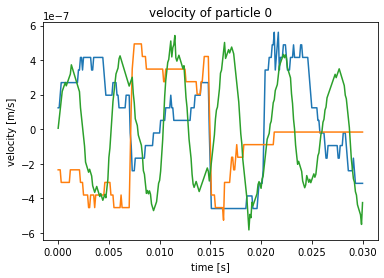

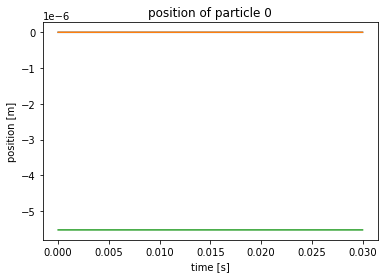

In [43]:
plt.plot(np.linspace(0,Simlen*tstep,Simlen+1), v[:,:].cpu().numpy())
plt.title('velocity of particle 0')
plt.xlabel("time [s]")
plt.ylabel("velocity [m/s]")
plt.show()
plt.plot(np.linspace(0,Simlen*tstep,Simlen+1),x[:,:].cpu().numpy())
plt.title('position of particle 0')
plt.xlabel("time [s]")
plt.ylabel("position [m]")
plt.show()

In [ ]:
print()

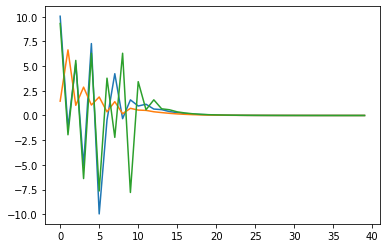

In [28]:
plt.plot(v[0:40,:].cpu().numpy())

In [4]:
print(t.round(1000*t.norm(particles.v,dim=1)))
T=t.round(1000*t.norm(particles.v,dim=1))
k=0
for i in T:
    if i==0:
        k+=1
print(k)

AttributeError: type object 'particles' has no attribute 'v'

In [36]:
temps=[]
prop=[]
for Tinv in tqdm(range(1,100),desc="running simulations"):
    T=Tinv*0.075
    temps.append(T)
    particles.createuniform(T=T)
    Simlen=300
    x,v=particles.init_track(Simlen=Simlen)
    tstep=0.0001
    for i in range (Simlen):
        _,_  =forward(timestep=tstep,acceladj=True,grav=True)
        x,v=particles.track(x,v,i)
    s=t.round(1000*t.norm(particles.v,dim=1))
    k=0
    for i in s:
        if i==0:
            k+=1
    prop.append(k/5000)
    

    


running simulations: 100%|██████████| 99/99 [22:30<00:00, 13.65s/it]


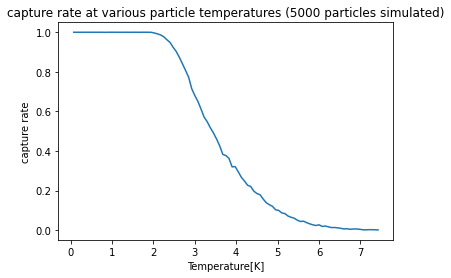

In [38]:
prop=np.array(prop)
plt.plot(temps,prop)
plt.xlabel("Temperature[K]")
plt.ylabel("capture rate")
plt.title("capture rate at various particle temperatures (5000 particles simulated)")
plt.show()  

In [88]:
S=[]
for i in tqdm(range(1,300)):
    Bgrad=i/1000
    Environment.B=Tensor([Bgrad,Bgrad,-2*Bgrad]).cuda() #zeeman along a given direction
    direction=1*np.array([1,1,1])
    num=30000
    d=np.linalg.norm(direction)
    pos=t.zeros((3,num))
    pos[0]=t.linspace(-direction[0],direction[0],num)
    pos[1]=t.linspace(-direction[1],direction[1],num)
    pos[2]=t.linspace(-direction[2],direction[2],num)
    pos=pos.transpose(0,1)
    vel=t.zeros((3,num)).transpose(0,1)
    particles.createbyinp(pos,vel,2,3)
    Accel,_=forward()
    A=Accel.cpu().numpy()[:,0]
    #size=max(A)
    size=abs(np.where(A==min(A))[0]-np.where(A==max(A))[0])*d/num
    S.append(size[0])
S=np.array(S)
Environment.B=vr.A
'''
    plt.title('Acceleration due to Zeeman trapping for atoms along the direction: '+str(np.round(100*direction/d)))
    plt.plot(np.linspace(-d,d,num),A[:,0],label='x')
    plt.plot(np.linspace(-d,d,num),A[:,1],label='y')
    plt.plot(np.linspace(-d,d,num),A[:,2],label='z')
    plt.xlabel('Distance along direction ' +str(np.round(100*direction/d))+' in meters')
    plt.ylabel('Acceleration in m/s^2')
    plt.legend()
    plt.show()
    print(np.sum(A[int(num/2):,0]*d/num))
    '''


 22%|██▏       | 65/299 [00:08<00:31,  7.52it/s]


KeyboardInterrupt: 

[0.00236714]


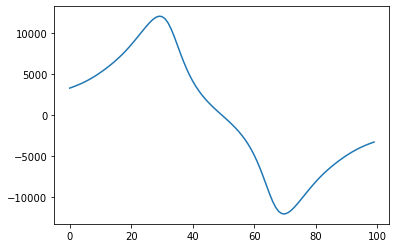

In [49]:
plt.plot(A[14950:15050])
print(size)

[array([0.58092984, 0.58087211]) array([0.3410408])
 array([0.23117105, 0.23111331]) array([0.17395564, 0.1738979 ])
 array([0.13919915]) array([0.11610514]) array([0.09947745])
 array([0.08712216]) array([0.07742267]) array([0.06968618])
 array([0.06333532]) array([0.0580237]) array([0.05363584])
 array([0.04970986]) array([0.0464767]) array([0.04358995])
 array([0.04093413]) array([0.0387402]) array([0.03666174])
 array([0.03481422]) array([0.03319764]) array([0.03169653])
 array([0.03031089]) array([0.02904072]) array([0.02788602])
 array([0.02684679]) array([0.02580756]) array([0.0248838])
 array([0.02407551]) array([0.02326722]) array([0.02245893])
 array([0.02176611]) array([0.02107328]) array([0.02049593])
 array([0.01991858]) array([0.01934123]) array([0.01887935])
 array([0.018302]) array([0.01784012]) array([0.01737824])
 array([0.01703183]) array([0.01656995]) array([0.01622354])
 array([0.01587713]) array([0.01553072]) array([0.01518431])
 array([0.0148379]) array([0.014491

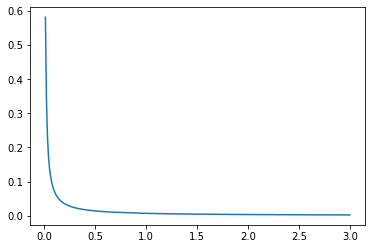

In [56]:
X=0.01*np.linspace(1,300,num=299,endpoint=True)
plt.plot(X,S)
plt.xlabel("")
plt.ylabel("")
plt.show()

In [82]:
_,R=forward()

R=t.sum(R,dim=1)
M=t.zeros((particles.x.shape[0],12,12)).cuda()
M[:,5:,5:]=t.diag(t.ones(7)*-Rubidium.Gamma)
t.diag(t.ones(7)).shape
M[:,5:,5:]=t.mul(t.ones(R.shape[0],R.shape[2],R.shape[2]),-Rubidium.Gamma*t.diag(t.ones(R.shape[2]))).cuda()
Rsl=t.sum(R,dim=1).unsqueeze(2)
Rsu=t.sum(R,dim=2).unsqueeze(2)

M[:,5:,5:]-=t.mul(Rsl,t.mul(t.ones(R.shape[0],R.shape[2],R.shape[2]),t.diag(t.ones(R.shape[2]))).cuda())
M[:,:5,:5]=-t.mul(Rsu,t.mul(t.ones(R.shape[0],R.shape[1],R.shape[1]),t.diag(t.ones(R.shape[1]))).cuda())
M[:,5:,:5]=R.transpose(1,2)
M[:,:5,5:]=Rubidium.Gamma*t.mul(t.ones((R.shape[0],R.shape[1],R.shape[2]),device='cuda'),Rubidium.BranRat)+R
val,vec=t.linalg.eig(M[0])
val=val.cpu().numpy()
i=np.where(abs(val)==0.0)
print(vec[2])
print(val)
''
print(t.divide(vec[i][0],t.norm(vec[i][0],p=1)))
print(t.matmul(M[0],vec[i][0]))
print(i)
print(abs(val))''

tensor([ 0.0000e+00+0.j,  0.0000e+00+0.j, -1.9342e-12+0.j,  1.0210e-02+0.j,
        -1.4551e-02+0.j, -5.2195e-03+0.j, -2.8055e-03+0.j, -1.3048e-04+0.j,
         6.2959e-04+0.j,  1.8267e-04+0.j,  5.8468e-05+0.j,  2.3359e-04+0.j],
       device='cuda:0')
[-2.7588043e-18+0.j -3.8110004e+07+0.j  0.0000000e+00+0.j
 -3.8110000e+07+0.j  2.0000000e+00+0.j -3.8109988e+07+0.j
 -3.8110000e+07+0.j  5.7799405e-01+0.j -6.2268460e-01+0.j
 -3.8109984e+07+0.j -3.8109992e+07+0.j -3.8110000e+07+0.j]


'\nprint(t.divide(vec[i][0],t.norm(vec[i][0],p=1)))\nprint(t.matmul(M[0],vec[i][0]))\nprint(i)\nprint(abs(val))'

In [87]:
print(Rubidium.)

tensor([[0.7143, 0.2381, 0.0476, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.4762, 0.3810, 0.1429, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.2857, 0.4286, 0.2857, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.1429, 0.3810, 0.4762, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0476, 0.2381, 0.7143]],
       device='cuda:0')


In [68]:
Environment.Imax=50
print(RatesbyBeam(1,1,particles,Environment,Rubidium,True,True))
Environment.Imax=50

tensor([[0.1039, 0.1039, 0.1039, 0.1039, 0.1039, 0.1039],
        [0.1039, 0.1039, 0.1039, 0.1039, 0.1039, 0.1039],
        [0.1039, 0.1039, 0.1039, 0.1039, 0.1039, 0.1039],
        ...,
        [0.1039, 0.1039, 0.1039, 0.1039, 0.1039, 0.1039],
        [0.1039, 0.1039, 0.1039, 0.1039, 0.1039, 0.1039],
        [0.1039, 0.1039, 0.1039, 0.1039, 0.1039, 0.1039]], device='cuda:0')


torch.Size([5000, 5, 5])